In [31]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load CMIP6 via intake-esm
col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(col_url)

# Search catalog
query = col.search(
    experiment_id="historical",
    table_id="SImon",
    variable_id=["siu", "siv", "siconc"],
    member_id="r1i1p1f1",
    grid_label="gn"
    #time_range=("2000-01-01", None)
)

print(query.df.head())

dset_dict = query.to_dataset_dict(
    zarr_kwargs={'consolidated': True},
    xarray_combine_by_coords_kwargs={'compat': 'override'}
)

#for ds_name, ds in dset_dict.items():
print(f"Dataset: {ds_name}")
print(ds.data_vars)

# Access first dataset from search
# for model in dset_dict:
#    ds = dset_dict[model]
#    check if all variables in ds. if so, add model to list of accepted ones
model = 'CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn'
ds = dset_dict[model]


  activity_id institution_id     source_id experiment_id member_id table_id  \
0        CMIP      NOAA-GFDL      GFDL-CM4    historical  r1i1p1f1    SImon   
1        CMIP      NOAA-GFDL      GFDL-CM4    historical  r1i1p1f1    SImon   
2        CMIP      NOAA-GFDL      GFDL-CM4    historical  r1i1p1f1    SImon   
3        CMIP           IPSL  IPSL-CM6A-LR    historical  r1i1p1f1    SImon   
4        CMIP           IPSL  IPSL-CM6A-LR    historical  r1i1p1f1    SImon   

  variable_id grid_label                                             zstore  \
0         siu         gn  gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...   
1         siv         gn  gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...   
2      siconc         gn  gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...   
3      siconc         gn  gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...   
4         siu         gn  gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...   

   dcpp_init_year   version  
0             NaN  2

Dataset: CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn
Data variables:
    siconc   (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 332, 362), meta=np.ndarray>
    siu      (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 845, 332, 362), meta=np.ndarray>
    siv      (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 833, 332, 362), meta=np.ndarray>


In [34]:
model = 'CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn'
ds = dset_dict[model]


In [32]:
dset_dict.keys()

dict_keys(['CMIP.IPSL.IPSL-CM6A-LR.historical.SImon.gn', 'CMIP.NASA-GISS.GISS-E2-1-H.historical.SImon.gn', 'CMIP.NUIST.NESM3.historical.SImon.gn', 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.SImon.gn', 'CMIP.BCC.BCC-ESM1.historical.SImon.gn', 'CMIP.NCAR.CESM2-FV2.historical.SImon.gn', 'CMIP.CMCC.CMCC-ESM2.historical.SImon.gn', 'CMIP.NCC.NorESM2-MM.historical.SImon.gn', 'CMIP.CAMS.CAMS-CSM1-0.historical.SImon.gn', 'CMIP.MRI.MRI-ESM2-0.historical.SImon.gn', 'CMIP.BCC.BCC-CSM2-MR.historical.SImon.gn', 'CMIP.CMCC.CMCC-CM2-SR5.historical.SImon.gn', 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.SImon.gn', 'CMIP.CAS.FGOALS-g3.historical.SImon.gn', 'CMIP.NCC.NorESM2-LM.historical.SImon.gn', 'CMIP.AWI.AWI-ESM-1-1-LR.historical.SImon.gn', 'CMIP.NOAA-GFDL.GFDL-CM4.historical.SImon.gn', 'CMIP.AS-RCEC.TaiESM1.historical.SImon.gn', 'CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.SImon.gn', 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.SImon.gn', 'CMIP.MPI-M.MPI-ESM1-2-LR.historical.SImo

In [35]:
print(ds.coords)


Coordinates:
    area            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T...
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type            |S255 ...
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan


In [23]:
print(ds.data_vars)


Data variables:
    siconc   (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 332, 362), meta=np.ndarray>
    siu      (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 845, 332, 362), meta=np.ndarray>
    siv      (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 833, 332, 362), meta=np.ndarray>


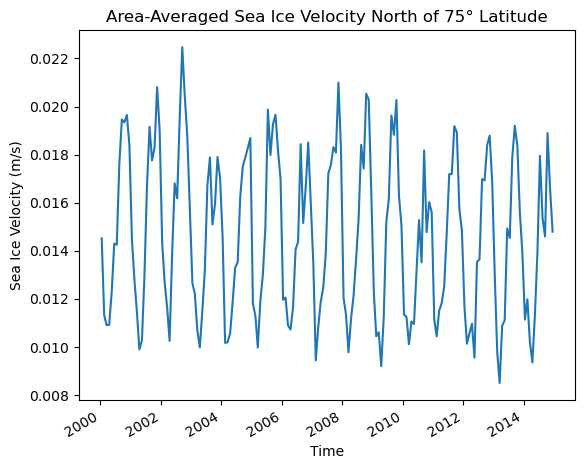

In [36]:
# time filter
time = ds['time'].compute()
time_mask = time >= np.datetime64('2000-01-01')
ds_filtered_time = ds.where(time_mask, drop=True)

# latitude filter
lat = ds_filtered_time['y'].compute()
lat_mask = lat >= 75
ds_north_75 = ds_filtered_time.where(lat_mask, drop=True)

# Filter out land, open and zero velocities
condition = (
    (ds_north_75['siconc'] > 0) &  
    (ds_north_75['siu'] != 0) &   
    (ds_north_75['siv'] != 0)    
)

condition = condition.compute()

ds_filtered = ds_north_75.where(condition, drop=True)

# magnitude of sea ice velocity vector
velocity_magnitude = np.sqrt(ds_filtered['siu']**2 + ds_filtered['siv']**2)

# area-averaged sea ice velocity
# Check if 'area' variable exists; if not, assume equal weighting
if 'area' in ds_filtered:
    area = ds_filtered['area']
else:
    # If 'area' is not available, assume equal weighting
    area = xr.ones_like(velocity_magnitude)

area_weighted_velocity = (
    (velocity_magnitude * area).sum(dim=['y', 'x']) /
    area.sum(dim=['y', 'x'])
)

area_weighted_velocity.plot()
plt.title('Area-Averaged Sea Ice Velocity North of 75° Latitude')
plt.ylabel('Sea Ice Velocity (m/s)')
plt.xlabel('Time')
plt.show()
